<a href="https://colab.research.google.com/github/viethoang298/AI-MachineLearning/blob/main/DecisionTreeLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

test.py


In [ ]:
from sklearn import tree

X = [[0,0], [2,2]]
y = [0.5, 2.5]

clf = tree.DecisionTreeRegressor()
clf = clf.fit(X,y)
clf.predict([[1,1]])

array([0.5])

example_dt_iris.py


Plot the decision surface of a decision tree on the iris dataset

Plot the decision surface of a decision tree trained on pairs
of features of the iris dataset.

See :ref:`decision tree <tree>` for more information on the estimator.

For each pair of iris features, the decision tree learns decision
boundaries made of combinations of simple thresholding rules inferred from
the training samples.

This code was adapted from the example provided by scikit-learn, available at
http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#example-tree-plot-iris-py



<ipython-input-1-97c7fd353fb2>:82: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-1-97c7fd353fb2>:82: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-1-97c7fd353fb2>:82: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-1-97c7fd353fb2>:82: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-1-97c7fd353fb2>:82: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-i

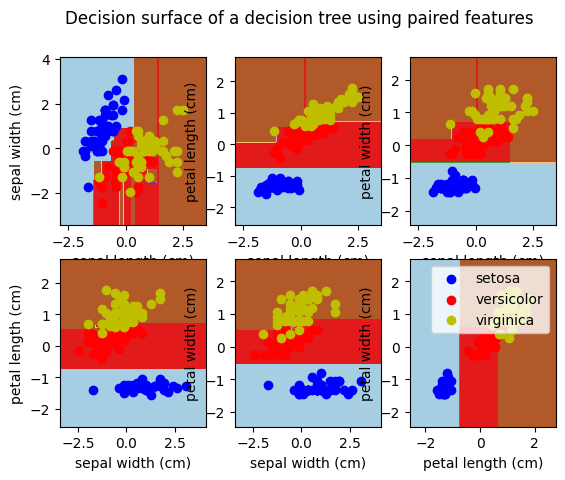

In [ ]:
"""
================================================================
Plot the decision surface of a decision tree on the iris dataset
================================================================

Plot the decision surface of a decision tree trained on pairs
of features of the iris dataset.

See :ref:`decision tree <tree>` for more information on the estimator.

For each pair of iris features, the decision tree learns decision
boundaries made of combinations of simple thresholding rules inferred from
the training samples.

This code was adapted from the example provided by scikit-learn, available at
http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#example-tree-plot-iris-py
"""
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Shuffle
    # <array>.shape returns the dimensions of the array
    # arange (start,stop,step) creates a 1-D vector
    idx = np.arange(X.shape[0])  # returns an array from 0 to X.shape[0], or 150
    np.random.seed(13)  # Seed the randomization
    np.random.shuffle(idx)  # Shuffle in place based on the seeded randomization

    X = X[idx]   # re-sort X randomly based on IDX as indices
    y = y[idx]

    # Standardize
    mean = X.mean(axis=0)    # Take the mean over the first axis (long axis)
    std = X.std(axis=0)
    X = (X - mean) / std   # Normalize to a 'normal distribution'

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Meshgrid creates coordinate grid from vectors of coordinates
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    # Ravel creates a 1-D view of the vector
    # c_ concatenates 1D vectors into columns of a 2D array, basically
    #    making xx.ravel() column 0, yy.ravel() column 1
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

dtree_eval.py

Comparing Decision Trees

In [ ]:
'''
    TEMPLATE FOR MACHINE LEARNING HOMEWORK
    AUTHOR Eric Eaton, Chris Clingerman
'''

import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.metrics import accuracy_score



def evaluatePerformance():
    '''
    Evaluate the performance of decision trees,
    averaged over 1,000 trials of 10-fold cross validation

    Return:
      a matrix giving the performance that will contain the following entries:
      stats[0,0] = mean accuracy of decision tree
      stats[0,1] = std deviation of decision tree accuracy
      stats[1,0] = mean accuracy of decision stump
      stats[1,1] = std deviation of decision stump
      stats[2,0] = mean accuracy of 3-level decision tree
      stats[2,1] = std deviation of 3-level decision tree

    ** Note that your implementation must follow this API**
    '''

    # Load Data
    filename = 'https://raw.githubusercontent.com/adziorny/CIS419/master/Assignment1/hw1_skeleton/data/SPECTF.dat'
    data = np.loadtxt(filename, delimiter=',')
    X = data[:, 1:]  #data input from all rows and second colloums
    y = np.array([data[:, 0]]).T
    n,d = X.shape

    # shuffle the data
    num_trials = 100
    num_folds = 10
    fold_accuracy = np.zeros((num_trials*num_folds,3))
    depths = [None, 1, 3]
    for i in range(num_trials):
      idx = np.arange(n)
      np.random.seed(13)
      np.random.shuffle(idx)
      X = X[idx]
      y = y[idx]
      for j in range(num_folds):
        # split the data
            test_indices = idx[j * (n // num_folds): (j + 1) * (n // num_folds)]
            train_indices = np.concatenate([idx[:j * (n // num_folds)], idx[(j + 1) * (n // num_folds):]])

            Xtrain, Xtest = X[train_indices], X[test_indices]
            ytrain, ytest = y[train_indices], y[test_indices]

            for depth_idx, depth in enumerate(depths):
                clf = tree.DecisionTreeClassifier(max_depth=depth)
                clf.fit(Xtrain, ytrain)
                y_pred = clf.predict(Xtest)
                # compute the training accuracy of the model
                meanDecisionTreeAccuracy = accuracy_score(ytest, y_pred)
                fold_accuracy[(i*num_folds+j, depth_idx)] = meanDecisionTreeAccuracy


    # TODO: update these statistics based on the results of your experiment
    meanDecisionTreeAccuracy = np.mean(fold_accuracy, axis=0)
    stddevDecisionTreeAccuracy = np.std(fold_accuracy, axis=0)

    # make certain that the return value matches the API specification
    stats = np.zeros((3,2))
    stats[0,0] = meanDecisionTreeAccuracy[0]
    stats[0,1] = stddevDecisionTreeAccuracy[0]
    stats[1,0] = meanDecisionTreeAccuracy[1]
    stats[1,1] = stddevDecisionTreeAccuracy[1]
    stats[2,0] = meanDecisionTreeAccuracy[2]
    stats[2,1] = stddevDecisionTreeAccuracy[2]
    return stats



# Do not modify from HERE...
if __name__ == "__main__":

    stats = evaluatePerformance()
    print ("Decision Tree Accuracy = ", stats[0,0], " (", stats[0,1], ")")
    print ("Decision Stump Accuracy = ", stats[1,0], " (", stats[1,1], ")")
    print ("3-level Decision Tree = ", stats[2,0], " (", stats[2,1], ")")
# ...to HERE.

Decision Tree Accuracy =  0.7379999999999994  ( 0.08708507708492687 )
Decision Stump Accuracy =  0.7936538461538399  ( 0.07455762038448165 )
3-level Decision Tree =  0.7583461538461524  ( 0.07946670435214802 )


Draw learning curve

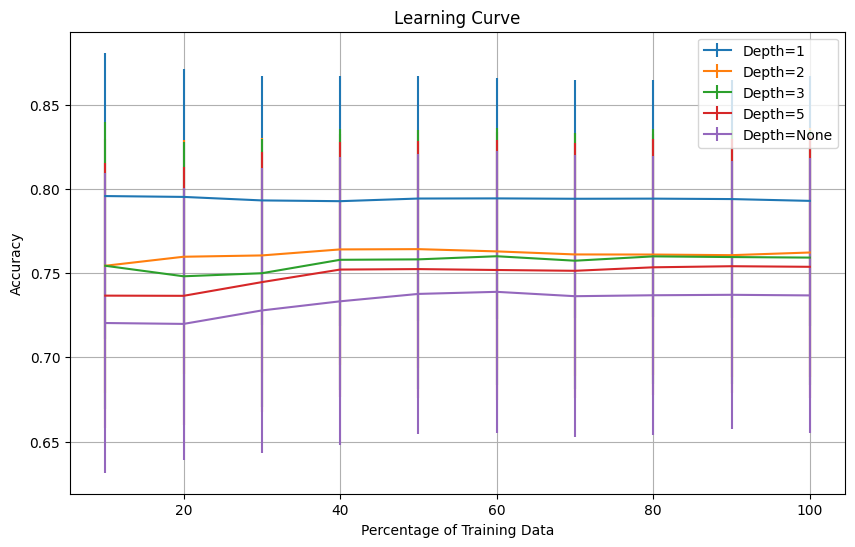

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def evaluatePerformance():
    # Load Data
    filename = 'https://raw.githubusercontent.com/adziorny/CIS419/master/Assignment1/hw1_skeleton/data/SPECTF.dat'
    data = np.loadtxt(filename, delimiter=',')
    X = data[:, 1:]
    y = data[:, 0]
    n, d = X.shape

    np.random.seed(13)  # Seed for reproducibility

    num_trials = 100
    num_folds = 10
    accuracies = np.zeros((num_trials * num_folds, 5))  # To store accuracy values for each fold and model

    idx = np.arange(n)

    # Varying depths for decision trees
    depths = [1, 2, 3, 5, None]

    for i in range(num_trials):
        np.random.shuffle(idx)  # Shuffle data indices for each trial

        for j in range(num_folds):
            test_indices = idx[j * (n // num_folds): (j + 1) * (n // num_folds)]
            train_indices = np.concatenate([idx[:j * (n // num_folds)], idx[(j + 1) * (n // num_folds):]])

            Xtrain, Xtest = X[train_indices], X[test_indices]
            ytrain, ytest = y[train_indices], y[test_indices]

            for depth_idx, depth in enumerate(depths):
                clf = DecisionTreeClassifier(max_depth=depth)
                clf.fit(Xtrain, ytrain)
                y_pred = clf.predict(Xtest)
                accuracies[i * num_folds + j, depth_idx] = accuracy_score(ytest, y_pred)

    # Calculate mean and standard deviation for each depth
    mean_accuracies = np.mean(accuracies, axis=0)
    std_accuracies = np.std(accuracies, axis=0)

    # Calculate mean accuracy and standard deviation for each training subset
    subset_sizes = np.arange(0.1, 1.1, 0.1)
    mean_subset_accuracies = np.zeros((len(subset_sizes), len(depths)))
    std_subset_accuracies = np.zeros((len(subset_sizes), len(depths)))

    for i, subset_size in enumerate(subset_sizes):
        for depth_idx, depth in enumerate(depths):
            subset_end = int(subset_size * n)
            subset_accuracies = accuracies[:, depth_idx][accuracies[:, depth_idx] != 0][:subset_end]
            mean_subset_accuracies[i, depth_idx] = np.mean(subset_accuracies)
            std_subset_accuracies[i, depth_idx] = np.std(subset_accuracies)

    # Plotting the learning curve
    plt.figure(figsize=(10, 6))

    for depth_idx, depth in enumerate(depths):
        plt.errorbar(subset_sizes * 100, mean_subset_accuracies[:, depth_idx],
                     yerr=std_subset_accuracies[:, depth_idx], label=f'Depth={depth}')

    plt.xlabel('Percentage of Training Data')
    plt.ylabel('Accuracy')
    plt.title('Learning Curve')
    plt.legend()
    plt.grid()
    plt.show()

# Test the function
evaluatePerformance()
